In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# generate the dataset
from sklearn.datasets import make_blobs

# PCA
from sklearn.decomposition import PCA

from ensemble_autoencoder import EnsembleRandomAutoencoder

In [2]:
def generate_random_dataset():
    # generate
    X1, y1 = make_blobs(n_samples=10000, centers=1, center_box=(10, 15), n_features=15)
    X2, y2 = make_blobs(n_samples=100, centers=1, center_box=(-4, -3), n_features=15)
    
    # stack the data and shuffle
    X = np.vstack((X1, X2))
    np.random.shuffle(X)
    
    # stack the data and shuffle
    X = np.vstack((X1, X2))
    np.random.shuffle(X)
    return X

def plot_data(data):
    # plot
    plt.scatter(data[:, 0], data[:, 1])
    plt.xlabel('feature1')
    plt.ylabel('feature2')
    plt.title('Some random dataset')
    plt.show()
    
def plot_data_outliers(data, preds, title):
    df = pd.DataFrame(np.hstack((data, preds.reshape(preds.shape[0], 1))), columns=['feature1', 'feature2', 'label'])
    groups = df.groupby("label")
    plt.title(title)
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    colors = ['blue', 'red']
    for idx, (lab, group) in enumerate(groups):
        plt.plot(group['feature1'], group['feature2'], marker='o', linestyle="", label=lab, color=colors[idx])
    plt.legend()
    plt.show()

In [3]:
data = generate_random_dataset()

In [4]:
data.shape

(10100, 15)

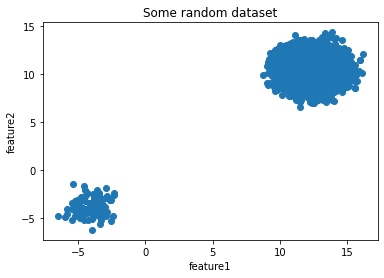

In [5]:
# plot first 2 dimensions of the data
plot_data(data)

In [6]:
pca_model = PCA(n_components=2)
reduced_data = pca_model.fit_transform(data)

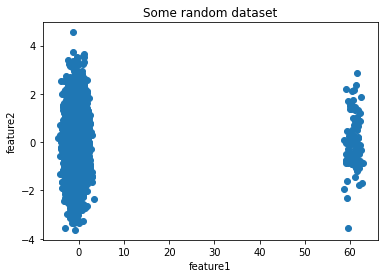

In [7]:
plot_data(reduced_data)

In [8]:
batchs_size = [32, 64, 128, 256]
model_ensemble_ae = EnsembleRandomAutoencoder(batchs_size, 20, data, input_size=15, nb_epochs=20)

In [9]:
model_ensemble_ae.display_loaders_info()

Data Loader nb: 1
Nb batch:       144
Batch size:     64
Nb samples:     9216
-------------
Data Loader nb: 2
Nb batch:       309
Batch size:     32
Nb samples:     9888
-------------
Data Loader nb: 3
Nb batch:       129
Batch size:     64
Nb samples:     8256
-------------
Data Loader nb: 4
Nb batch:       277
Batch size:     32
Nb samples:     8864
-------------
Data Loader nb: 5
Nb batch:       134
Batch size:     64
Nb samples:     8576
-------------
Data Loader nb: 6
Nb batch:       123
Batch size:     64
Nb samples:     7872
-------------
Data Loader nb: 7
Nb batch:       61
Batch size:     128
Nb samples:     7808
-------------
Data Loader nb: 8
Nb batch:       30
Batch size:     256
Nb samples:     7680
-------------
Data Loader nb: 9
Nb batch:       68
Batch size:     128
Nb samples:     8704
-------------
Data Loader nb: 10
Nb batch:       223
Batch size:     32
Nb samples:     7136
-------------
Data Loader nb: 11
Nb batch:       39
Batch size:     256
Nb samples:     9984


In [10]:
model_ensemble_ae.print_models()

Model nb 1
Input size: 15
Latent size: 5
Alpha coef: 0.6
Layers_size: [15, 9, 5]
-------------
Model nb 2
Input size: 15
Latent size: 5
Alpha coef: 0.69
Layers_size: [15, 10, 6, 5]
-------------
Model nb 3
Input size: 15
Latent size: 6
Alpha coef: 0.78
Layers_size: [15, 11, 8, 6]
-------------
Model nb 4
Input size: 15
Latent size: 3
Alpha coef: 0.55
Layers_size: [15, 8, 4, 3]
-------------
Model nb 5
Input size: 15
Latent size: 6
Alpha coef: 0.59
Layers_size: [15, 8, 6]
-------------
Model nb 6
Input size: 15
Latent size: 7
Alpha coef: 0.54
Layers_size: [15, 8, 7]
-------------
Model nb 7
Input size: 15
Latent size: 3
Alpha coef: 0.65
Layers_size: [15, 9, 5, 3]
-------------
Model nb 8
Input size: 15
Latent size: 3
Alpha coef: 0.7
Layers_size: [15, 10, 7, 4, 3]
-------------
Model nb 9
Input size: 15
Latent size: 6
Alpha coef: 0.73
Layers_size: [15, 10, 7, 6]
-------------
Model nb 10
Input size: 15
Latent size: 3
Alpha coef: 0.72
Layers_size: [15, 10, 7, 5, 3]
-------------
Model nb 

In [11]:
model_ensemble_ae.models_summary()

Model nb 1
Autoencoder(
  (layers): ModuleList(
    (0): Linear(in_features=15, out_features=9, bias=True)
    (1): Linear(in_features=9, out_features=5, bias=True)
    (2): Linear(in_features=5, out_features=9, bias=True)
    (3): Linear(in_features=9, out_features=15, bias=True)
  )
)
-------------
Model nb 2
Autoencoder(
  (layers): ModuleList(
    (0): Linear(in_features=15, out_features=10, bias=True)
    (1): Linear(in_features=10, out_features=6, bias=True)
    (2): Linear(in_features=6, out_features=5, bias=True)
    (3): Linear(in_features=5, out_features=6, bias=True)
    (4): Linear(in_features=6, out_features=10, bias=True)
    (5): Linear(in_features=10, out_features=15, bias=True)
  )
)
-------------
Model nb 3
Autoencoder(
  (layers): ModuleList(
    (0): Linear(in_features=15, out_features=11, bias=True)
    (1): Linear(in_features=11, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=6, bias=True)
    (3): Linear(in_features=6, out_features=8, bias

In [12]:
model_ensemble_ae.fit()

TRAINING ae nb. 1
Epoch nb 1
[======================]
epoch : 1/20, loss = 148.167697
Epoch nb 2
[======================]
epoch : 2/20, loss = 148.125820
Epoch nb 3
[======================]
epoch : 3/20, loss = 148.092783
Epoch nb 4
[======================]
epoch : 4/20, loss = 148.105335
Epoch nb 5
[======================]
epoch : 5/20, loss = 148.091692
Epoch nb 6
[======================]
epoch : 6/20, loss = 148.062828
Epoch nb 7
[======================]
epoch : 7/20, loss = 148.048032
Epoch nb 8
[======================]
epoch : 8/20, loss = 148.003679
Epoch nb 9
[======================]
epoch : 9/20, loss = 147.996130
Epoch nb 10
[======================]
epoch : 10/20, loss = 147.970223
Epoch nb 11
[======================]
epoch : 11/20, loss = 147.938228
Epoch nb 12
[======================]
epoch : 12/20, loss = 147.955076
Epoch nb 13
[======================]
epoch : 13/20, loss = 147.912334
Epoch nb 14
[======================]
epoch : 14/20, loss = 147.923980
Epoch nb 15
[=======

[======================]
epoch : 17/20, loss = 147.732012
Epoch nb 18
[======================]
epoch : 18/20, loss = 147.726827
Epoch nb 19
[======================]
epoch : 19/20, loss = 147.767711
Epoch nb 20
[======================]
epoch : 20/20, loss = 147.701771

TRAINING ae nb. 7
Epoch nb 1
[======================]
epoch : 1/20, loss = 148.186628
Epoch nb 2
[======================]
epoch : 2/20, loss = 148.179107
Epoch nb 3
[======================]
epoch : 3/20, loss = 148.184558
Epoch nb 4
[======================]
epoch : 4/20, loss = 148.157307
Epoch nb 5
[======================]
epoch : 5/20, loss = 148.181951
Epoch nb 6
[======================]
epoch : 6/20, loss = 148.182941
Epoch nb 7
[========

KeyboardInterrupt: 

In [13]:
model_ensemble_ae_preds = model_ensemble_ae.outliers_scoring(data)

In [14]:
model_ensemble_ae_preds.shape

torch.Size([10100])

In [16]:
print(model_ensemble_ae_preds[:10])

tensor([2236.9548, 2318.5857, 2368.1042, 2417.3074, 2316.6389, 2469.1787,
        2345.4670, 2358.6958, 2262.4824, 2252.5703], grad_fn=<SliceBackward>)


In [17]:
n = 100
outliers_pos = model_ensemble_ae_preds.argsort()[-n:]

preds_ae_model = np.ones(len(model_ensemble_ae_preds))
preds_ae_model[outliers_pos] = -1

In [18]:
preds_ae_model

array([1., 1., 1., ..., 1., 1., 1.])

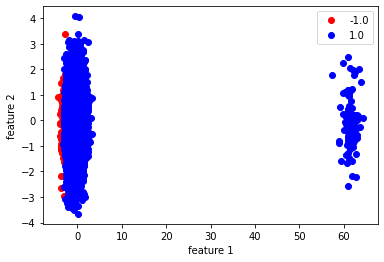

In [20]:
df = pd.DataFrame(np.hstack((reduced_data, preds_ae_model.reshape(preds_ae_model.shape[0], 1))), columns=['feature1', 'feature2', 'label'])
groups = df.groupby("label")
plt.title('')
plt.xlabel("feature 1")
plt.ylabel("feature 2")
colors = ['red', 'blue']
for idx, (lab, group) in enumerate(groups):
    plt.plot(group['feature1'], group['feature2'], marker='o', linestyle="", label=lab, color=colors[idx])
plt.legend()
plt.show()